# Working with Time Series

- Time stamps
- Time intervals
- Time details or durations

# Dates and Times in Python

## Native Python dates and times: datetime and dateutil

In [3]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [15]:
from dateutil import parser
date = parser.parse('4th of July, 2015')
print(date)
date1 = parser.parse('1-1-1970')
print(date1)
date2 = parser.parse('1970-1-1')
print(date2)
date3 = parser.parse('1970 1 1')
print(date3)
date4 = parser.parse('1/1/70')
print(date4)

2015-07-04 00:00:00
1970-01-01 00:00:00
1970-01-01 00:00:00
1970-01-01 00:00:00
1970-01-01 00:00:00


In [24]:
date = datetime.today()

In [25]:
type(date)

datetime.datetime

In [26]:
date.strftime('%a')

'Fri'

In [27]:
date.strftime('%A')

'Friday'

In [28]:
date.strftime('%b')

'Aug'

In [29]:
date.strftime('%B')

'August'

In [30]:
date.strftime('%c')

'Fri Aug 28 14:28:21 2020'

In [31]:
date.strftime('%C')

'20'

In [51]:
date.strftime('%A, %m/%d/%Y')


'Friday, 08/28/2020'

In [54]:
import numpy as np
date = np.array(date.strftime('%Y-%m-%d'), dtype='datetime64')
date

array('2020-08-28', dtype='datetime64[D]')

In [58]:
date + np.arange(12)

array(['2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
       '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
       '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08'],
      dtype='datetime64[D]')

In [59]:
np.datetime64('2020-08-12')

numpy.datetime64('2020-08-12')

In [60]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [62]:
nanodate = np.datetime64('2015-07-04 12:59:59.50', 'ns')

In [63]:
nanodate + 1

numpy.datetime64('2015-07-04T12:59:59.500000001')

## Dates and times in pandas: best of both worlds

In [64]:
import pandas as pd
date = pd.to_datetime('12th of August, 1976')
date

Timestamp('1976-08-12 00:00:00')

In [65]:
date.strftime('%A')

'Thursday'

In [66]:
date + pd.to_timedelta(np.arange(12), 'D')


DatetimeIndex(['1976-08-12', '1976-08-13', '1976-08-14', '1976-08-15',
               '1976-08-16', '1976-08-17', '1976-08-18', '1976-08-19',
               '1976-08-20', '1976-08-21', '1976-08-22', '1976-08-23'],
              dtype='datetime64[ns]', freq=None)

In [67]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [72]:
data['2014-07-04':'2015-07-03']

2014-07-04    0
2014-08-04    1
dtype: int64

In [73]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas Time Series Data Structures

In [75]:
dates = pd.to_datetime([datetime(2015,7,3), '4th of July, 2015',
                       '2015-Jul-6','07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [76]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [77]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Regular sequences: pd.date_range()

In [78]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [82]:
pd.date_range('2015-07-03','2015-07-31')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14',
               '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18',
               '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22',
               '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26',
               '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30',
               '2015-07-31'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [84]:

pd.date_range('1976-08-12', periods=10, freq='Y')

DatetimeIndex(['1976-12-31', '1977-12-31', '1978-12-31', '1979-12-31',
               '1980-12-31', '1981-12-31', '1982-12-31', '1983-12-31',
               '1984-12-31', '1985-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [85]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [87]:
pd.period_range('1976-08-12', periods=44, freq='Y')

PeriodIndex(['1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
             '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
             '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
             '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
             '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
             '2016', '2017', '2018', '2019'],
            dtype='period[A-DEC]', freq='A-DEC')

In [88]:
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

Code|	Description	|Code	|Description
-------|-------------|-------|-----------
D	|Calendar day|	B	|Business day
W	|Weekly|	|	
M	|Month end	|BM	|Business month end
Q	|Quarter end|	BQ|	Business quarter end
A	|Year end|	BA	|Business year end
H	|Hours	|BH	|Business hours
T	|Minutes|		|
S	|Seconds	|	|
L	|Milliseonds	|	|
U	|Microseconds	|	|
N	|nanoseconds	|	|

Code|	Description		|Code	|Description
----|--------------------|------|-----------
MS|	Month start	|	BMS|	Business month start
QS	|Quarter start	|	BQS|	Business quarter start
AS|	Year start	|	BAS|	Business year start

In [89]:
pd.timedelta_range(0,periods=9, freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [91]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

In [96]:
from pandas_datareader import data
lyg = data.DataReader('LYG', start='2004', end='2020',data_source='yahoo')
lyg.head()
lyg.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3.29,3.23,3.23,3.28,3837500.0,3.039298
2019-12-26,3.31,3.26,3.26,3.30,3747300.0,3.057831
2019-12-27,3.31,3.28,3.30,3.29,5863600.0,3.048564
2019-12-30,3.31,3.28,3.28,3.30,7302900.0,3.057831
2019-12-31,3.32,3.26,3.26,3.31,3124300.0,3.067097


In [97]:
lyg = lyg['Close']

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

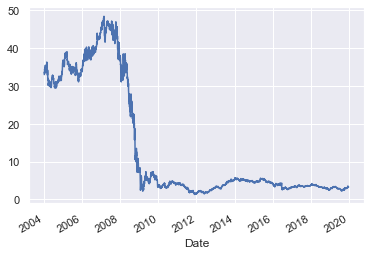

In [99]:
lyg.plot()

## Resampling and converting frequences

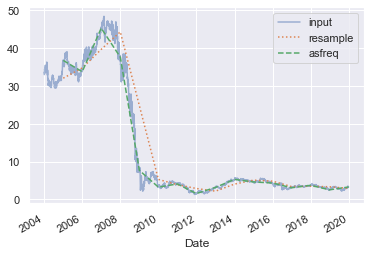

In [103]:
lyg.plot(alpha=0.5, style='-')
lyg.resample('BA').mean().plot(style=':')
lyg.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'], loc='upper right')

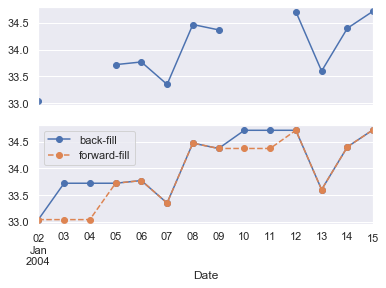

In [106]:
fig, ax = plt.subplots(2, sharex=True)
data = lyg.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

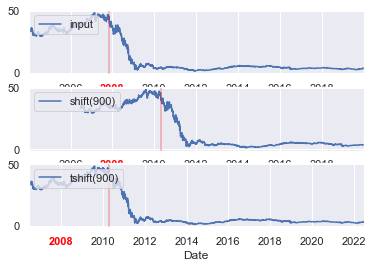

In [107]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
lyg = lyg.asfreq('D', method='pad')

lyg.plot(ax=ax[0])
lyg.shift(900).plot(ax=ax[1])
lyg.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

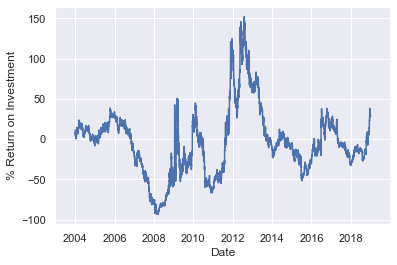

In [108]:
ROI = 100 * (lyg.tshift(-365) / lyg - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

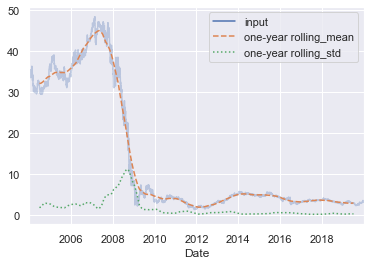

In [109]:
rolling = lyg.rolling(365, center=True)

data = pd.DataFrame({'input': lyg,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

In [110]:
#!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1582k    0 1582k    0     0   759k      0 --:--:--  0:00:02 --:--:--  759k
100 3278k    0 3278k    0     0  1051k      0 --:--:--  0:00:03 --:--:-- 1051k
100 4202k    0 4202k    0     0  1170k      0 --:--:--  0:00:03 --:--:-- 1170k


In [111]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [114]:
data.columns = ['Total', 'East', 'West']

In [115]:
data.dropna().describe()

,Total,East,West
count,134849.000000,134849.000000,134849.000000
mean,113.115233,51.608940,61.506292
std,143.992450,66.405662,89.680806
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [116]:
%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

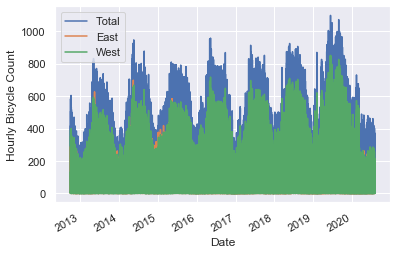

In [117]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

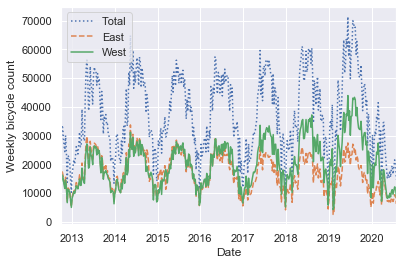

In [118]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

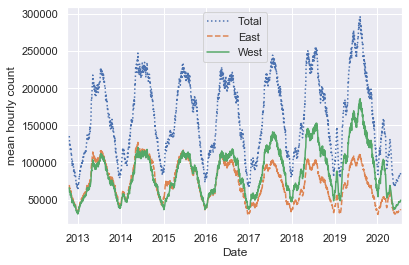

In [119]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

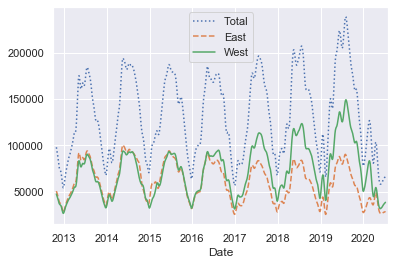

In [120]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);


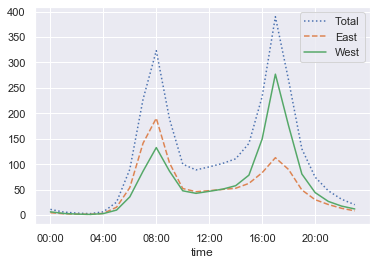

In [121]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

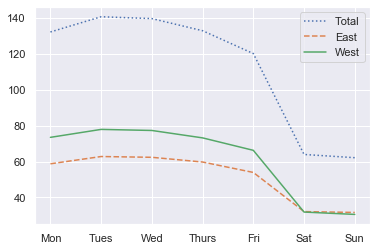

In [122]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

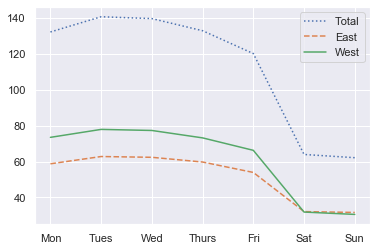

In [123]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

In [127]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

AttributeError: 'DataFrame' object has no attribute 'ix'

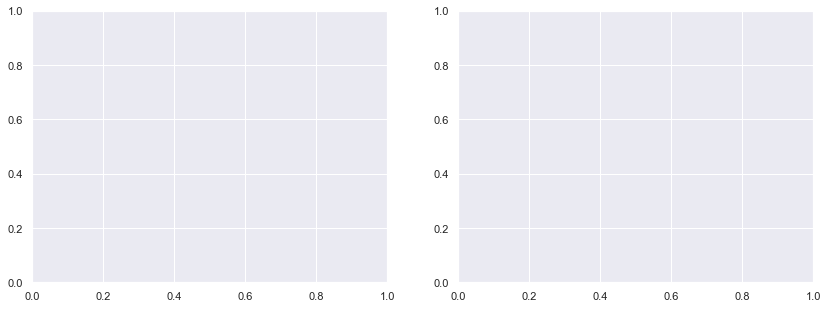

In [128]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);